In [1]:
# Install gdown jika belum ada
!pip install gdown

# File ID dan nama output
file_id = '1LmoDL_6PxvYZtEaPSYdViTDPm4E_KgE6'
output_file = 'Dataset.zip'

# Generate link download
download_link = f'https://drive.google.com/uc?id={file_id}'

# Download file
!gdown $download_link -O $output_file


Downloading...
From (original): https://drive.google.com/uc?id=1LmoDL_6PxvYZtEaPSYdViTDPm4E_KgE6
From (redirected): https://drive.google.com/uc?id=1LmoDL_6PxvYZtEaPSYdViTDPm4E_KgE6&confirm=t&uuid=9b99eb20-86c5-4fbc-8275-39d4b6b4c2d9
To: /kaggle/working/Dataset.zip
100%|████████████████████████████████████████| 350M/350M [00:03<00:00, 90.6MB/s]


In [2]:
!unzip /kaggle/working/Dataset.zip

Archive:  /kaggle/working/Dataset.zip
   creating: dataset-jenis-pakaian/
   creating: dataset-jenis-pakaian/test/
   creating: dataset-jenis-pakaian/test/blazers/
  inflating: dataset-jenis-pakaian/test/blazers/37.jpg  
  inflating: dataset-jenis-pakaian/test/blazers/38.jpg  
  inflating: dataset-jenis-pakaian/test/blazers/39.jpg  
  inflating: dataset-jenis-pakaian/test/blazers/40.jpg  
  inflating: dataset-jenis-pakaian/test/blazers/41.jpg  
  inflating: dataset-jenis-pakaian/test/blazers/42.jpg  
  inflating: dataset-jenis-pakaian/test/blazers/43.jpg  
   creating: dataset-jenis-pakaian/test/camisoles/
  inflating: dataset-jenis-pakaian/test/camisoles/37.jpg  
  inflating: dataset-jenis-pakaian/test/camisoles/38.jpg  
  inflating: dataset-jenis-pakaian/test/camisoles/39.jpg  
  inflating: dataset-jenis-pakaian/test/camisoles/40.jpg  
  inflating: dataset-jenis-pakaian/test/camisoles/41.jpg  
  inflating: dataset-jenis-pakaian/test/camisoles/42.jpg  
  inflating: dataset-jenis-pakai

In [3]:
import os

import numpy as np

import tensorflow as tf

import tensorflow_hub as hub

import matplotlib.pyplot as plt

from tensorflow.keras.utils import load_img, img_to_array

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_dir = "/kaggle/working/dataset-jenis-pakaian/train"

test_dir = "/kaggle/working/dataset-jenis-pakaian/test"

validation_dir = "/kaggle/working/dataset-jenis-pakaian/valid"



sorted_labels = [

    'blazers', 'camisoles', 'capris', 'casual shoes', 'dress', 'flat shoes',

    'flip flops', 'heels', 'jacket', 'jeans', 'jeggings', 'jumpsuit', 'leggings',

    'lounge pants', 'lounge shorts', 'sandals', 'shirts', 'shorts', 'shrug',

    'skirt', 'sports shoes', 'sports shoes','sweater', 'sweatshirts', 'tights', 'tops', 'track pants',

    'tracksuits', 'trousers', 't-shirts', 'tunics', 'waistcoat'

]



# train directories

train_directories = {label: os.path.join(train_dir, label) for label in sorted_labels}



test_directories = {label: os.path.join(test_dir, label) for label in sorted_labels}



# validation directories

validation_directories = {label: os.path.join(validation_dir, label) for label in sorted_labels}



for label in sorted_labels:

    print('Total training', label, 'images:', len(os.listdir(train_directories[label])))



for label in sorted_labels:

    print('Total test', label, 'images:', len(os.listdir(test_directories[label])))



for label in sorted_labels:

    print('Total validation', label, 'images:', len(os.listdir(validation_directories[label])))



blazers = os.listdir(train_directories['blazers'])

print(blazers[:5])

Total training blazers images: 36
Total training camisoles images: 36
Total training capris images: 36
Total training casual shoes images: 36
Total training dress images: 36
Total training flat shoes images: 36
Total training flip flops images: 36
Total training heels images: 36
Total training jacket images: 36
Total training jeans images: 36
Total training jeggings images: 36
Total training jumpsuit images: 36
Total training leggings images: 36
Total training lounge pants images: 36
Total training lounge shorts images: 36
Total training sandals images: 36
Total training shirts images: 36
Total training shorts images: 36
Total training shrug images: 36
Total training skirt images: 36
Total training sports shoes images: 36
Total training sports shoes images: 36
Total training sweater images: 36
Total training sweatshirts images: 36
Total training tights images: 36
Total training tops images: 36
Total training track pants images: 36
Total training tracksuits images: 36
Total training tro

In [8]:
# Feature extractor layer

feature_extractor_url = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'

feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=[300,300,3])

feature_extractor_layer.trainable = False

In [9]:
# Model

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(300, 300, 3)),  # Gunakan "shape" sebagai pengganti "input_shape"
    tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         8,224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,450,784 (5.53 MB)

 Trainable params: 1,450,784 (5.53 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer= optimizer,

              loss= 'categorical_crossentropy',

              metrics= ['accuracy'])

In [11]:
# Add data-augmentation parameters to ImageDataGenerator
from PIL import Image

def remove_transparency(image):
    if image.mode in ('RGBA', 'LA') or (image.mode == 'P' and 'transparency' in image.info):
        background = Image.new('RGB', image.size, (255, 255, 255))
        background.paste(image, mask=image.split()[3] if 'transparency' in image.info else None)
        return background
    else:
        return image


train_datagen = ImageDataGenerator(rescale= 1./255,

                                   rotation_range= 50,

                                   width_shift_range= 0.3,

                                   height_shift_range= 0.3,

                                   shear_range= 0.3,

                                   zoom_range= 0.3,

                                   horizontal_flip= True,

                                   fill_mode= 'nearest')




train_generator = train_datagen.flow_from_directory(train_dir,

                                                    batch_size= 32,

                                                    class_mode= 'categorical',

                                                    target_size= (300, 300))



validation_datagen = ImageDataGenerator(rescale = 1./255)



validation_generator = validation_datagen.flow_from_directory(validation_dir,

                                                    batch_size= 32,

                                                    class_mode= 'categorical',

                                                    target_size= (300, 300))

Found 1152 images belonging to 32 classes.
Found 278 images belonging to 32 classes.


In [12]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is not None and logs.get('accuracy') > 0.9:  # Periksa accuracy
            print("\nReached 90% training accuracy, so cancelling training!")
            self.model.stop_training = True


callbacks = Callback()


history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[callbacks]
)


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.1600 - loss: 3.0881 

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


36/36 ━━━━━━━━━━━━━━━━━━━━ 867s 23s/step - accuracy: 0.1624 - loss: 3.0759 - val_accuracy: 0.5144 - val_loss: 1.5384
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 830s 23s/step - accuracy: 0.4644 - loss: 1.6234 - val_accuracy: 0.5540 - val_loss: 1.2954
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 911s 24s/step - accuracy: 0.5992 - loss: 1.2949 - val_accuracy: 0.6331 - val_loss: 1.1001
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 856s 24s/step - accuracy: 0.6766 - loss: 1.0038 - val_accuracy: 0.6079 - val_loss: 1.0883
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 818s 23s/step - accuracy: 0.6688 - loss: 0.9980 - val_accuracy: 0.6547 - val_loss: 1.0422
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 879s 24s/step - accuracy: 0.6839 - loss: 0.9324 - val_accuracy: 0.6835 - val_loss: 0.9799
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 840s 23s/step - accuracy: 0.7188 - loss: 0.8439 - val_accuracy: 0.6655 - val_loss: 0.9942
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 871s 24s/step - accuracy: 0.7415 - loss: 0.7660 - val_accuracy: 0.6655 - val_

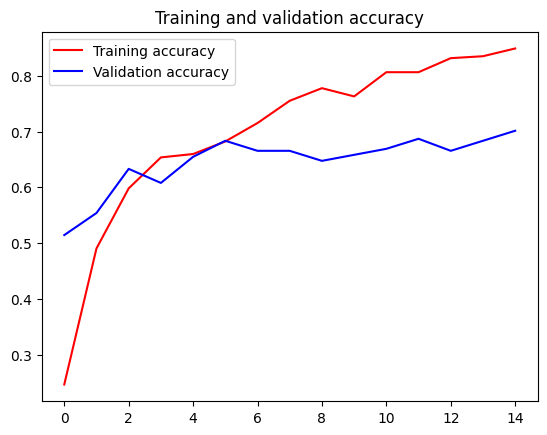

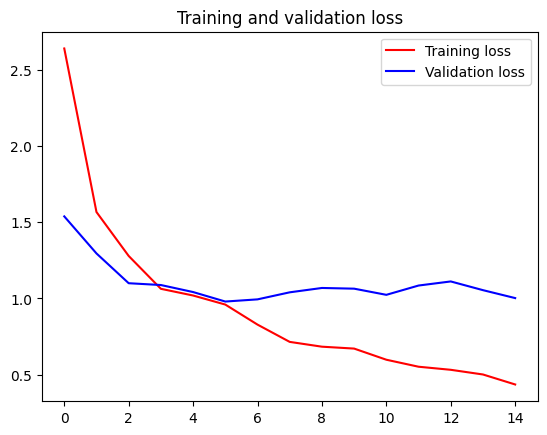

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the results

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']



epochs = range(len(acc))



# Plot the accuracy

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')

plt.legend(loc=0)

plt.figure()



# Plot the loss

plt.plot(epochs, loss, 'r', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend(loc=0)

plt.figure()



plt.show()

In [15]:
from tensorflow.keras.preprocessing import image

# List untuk label yang sudah terurut (sorted_labels harus sudah didefinisikan)
sorted_labels = sorted(os.listdir(test_dir))  # Mendapatkan label berdasarkan nama folder

# Untuk setiap label di direktori test
for label in sorted_labels:
    folder = os.path.join(test_dir, label)

    # Pastikan folder ada dan memiliki file
    if os.path.isdir(folder):
        for path_file in os.listdir(folder):
            path_file = os.path.join(folder, path_file)
            
            # Pastikan file tersebut adalah gambar (dengan ekstensi .jpg atau .png)
            if path_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Memuat gambar dan mengubah ukurannya
                img = image.load_img(path_file, target_size=(512, 512))

                # Mengonversi gambar ke array
                x = img_to_array(img)
                x = x / 255.0  # Normalisasi gambar
                x = np.expand_dims(x, axis=0)  # Menambahkan dimensi batch

                # Melakukan prediksi
                predictions = model.predict(x)

                # Mengambil indeks kelas dengan probabilitas tertinggi
                predicted_class_index = np.argmax(predictions)

                # Mengonversi indeks kelas ke label
                predicted_label = sorted_labels[predicted_class_index]

                # Menampilkan hasil prediksi
                print(f"Image: {path_file}, True Label: {label}, Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Image: /kaggle/working/dataset-jenis-pakaian/test/blazers/38.jpg, True Label: blazers, Predicted Label: blazers
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/working/dataset-jenis-pakaian/test/blazers/42.jpg, True Label: blazers, Predicted Label: blazers
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/working/dataset-jenis-pakaian/test/blazers/43.jpg, True Label: blazers, Predicted Label: waistcoat
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/working/dataset-jenis-pakaian/test/blazers/41.jpg, True Label: blazers, Predicted Label: blazers
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/working/dataset-jenis-pakaian/test/blazers/39.jpg, True Label: blazers, Predicted Label: blazers
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/working/dataset-jenis-pakaian/test/blazers/40.jpg, True Label: blazers, Predicted Label: blazers
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image: /kaggle/working/dataset-jenis-pakaian/test/blazers/37.jpg, True Lab

In [16]:
# Save the model

model.save("Model.h5")